In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from functools import reduce

import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv("winequality_red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

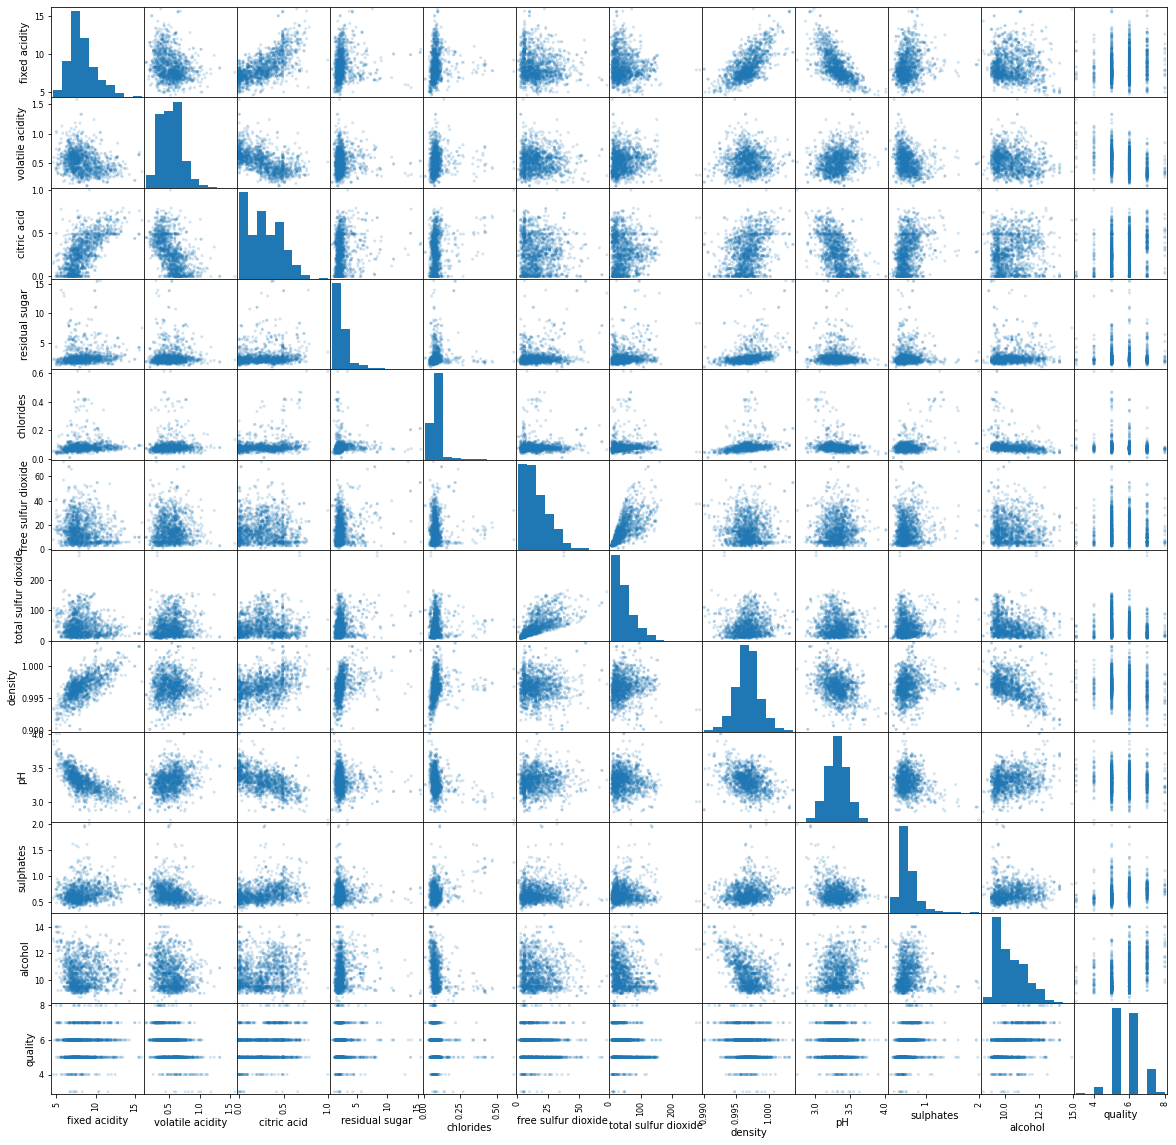

In [6]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (20,20))
plt.show()

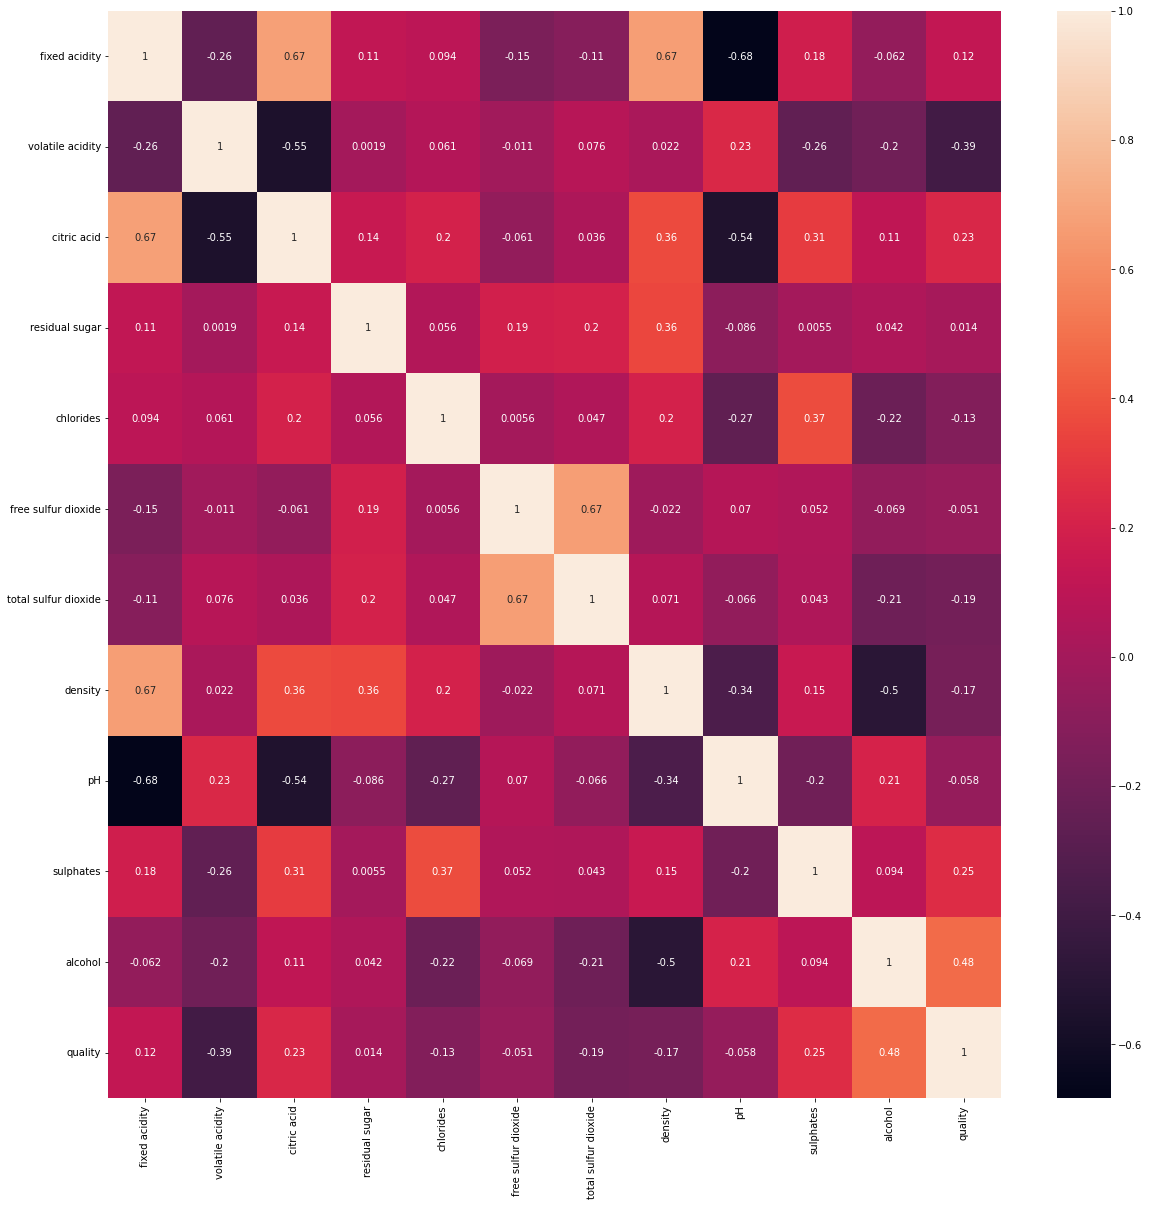

In [7]:
plt.figure(figsize=[20,20])
sb.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
df["good"] = [1 if x >= 6 else 0 for x in df.quality]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [10]:
X = df[df.columns.drop(['quality','good'])]
y = df['good']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [12]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components = 10)),
    ('model', SVC(kernel = 'linear', C = 1))
])

In [13]:
svm_model_linear = pipeline.fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [14]:
accuracy

0.76

In [15]:
cm

array([[141,  44],
       [ 52, 163]], dtype=int64)

In [16]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('model', SVC())
])

search = GridSearchCV(pipeline, {
    'pca__n_components': [1, 2, 5, 8, 10],
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'rbf']
}, refit=True, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA()), ('model', SVC())]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__kernel': ['linear', 'rbf'],
                         'pca__n_components': [1, 2, 5, 8, 10]})

In [17]:
search.best_params_

{'model__C': 10, 'model__kernel': 'rbf', 'pca__n_components': 8}

In [18]:
best_model = search.best_estimator_

In [19]:
best_model_predictions = best_model.predict(X_test)

In [20]:
print(classification_report(y_test, best_model_predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       185
           1       0.75      0.76      0.75       215

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



In [21]:
file_name = 'wine_model.pckl'
pickle.dump(best_model, open(file_name,'wb'))